<div style="float: right;">
  <a href="../de/pandas.html" style="margin-left: 10px;">🇩🇪 Deutsch</a>
  <a href="../en/pandas.html">🇬🇧 English</a>
</div>

# 6. pandas and matplotlib
Remember the library we installed in the last chapter? That library is called pandas and is arguably the most commonly used library in Python. It allows us to turn any data into a table, which we can then plot and analyze.

Let's look at it in action:

In [1]:
import pandas as pd
names = ["Alice", "Bob", "Charlie"]
ages = [25, 30, 35]
hobby = ["Completing Python tutorials", "sports", "Completing Python tutorials"]
data = {"Name": names, "Age": ages, "Hobby": hobby}
df = pd.DataFrame(data)
print(df)

      Name  Age                        Hobby
0    Alice   25  Completing Python tutorials
1      Bob   30                       sports
2  Charlie   35  Completing Python tutorials


As you can see, pandas allows us to neatly organize our data into a table.

We can now use pandas group_by function to group our data by a certain column and then apply another function to each group. In this case, we will group by the "Hobby" column and check how many people have the same hobby:

In [2]:
df_grouped = df.groupby("Hobby").size()
print(df_grouped)

Hobby
Completing Python tutorials    2
sports                         1
dtype: int64


Now, lets say we have a csv-file called "prices.csv" that we would normally open in Microsoft Excel that contains data we want to analyze. pandas allows us to read Excel files and turn them into a pandas DataFrame in just one line.

In [3]:
price_data = pd.read_csv("prices.csv")
print(price_data)

      timestamp  difference
0    2022-01-01     -842.52
1    2022-01-02     1490.70
2    2022-01-03     -495.08
3    2022-01-04     -734.92
4    2022-01-05     -610.64
..          ...         ...
360  2022-12-27      112.44
361  2022-12-28     -242.95
362  2022-12-29     -154.67
363  2022-12-30       86.83
364  2022-12-31      -21.54

[365 rows x 2 columns]


It contains timestamps and the differences in a stock course that happened between the timestamps. If we only want to see the data for a specific time period, we can filter the DataFrame by using the "loc" function. In this case, we want to see the data from 2023-01-01 to 2023-01-31:

In [4]:
start_date = "2022-02-01"
end_date = "2023-09-01"
filtered_data = price_data.loc[(price_data["timestamp"] >= start_date) & (price_data["timestamp"] <= end_date)]
print(filtered_data)

      timestamp  difference
31   2022-02-01      503.88
32   2022-02-02      317.67
33   2022-02-03    -1836.18
34   2022-02-04      337.87
35   2022-02-05     4293.08
..          ...         ...
360  2022-12-27      112.44
361  2022-12-28     -242.95
362  2022-12-29     -154.67
363  2022-12-30       86.83
364  2022-12-31      -21.54

[334 rows x 2 columns]


To plot this time-dependent data, we can first turn the timestamp-column into a date format and then plot it.

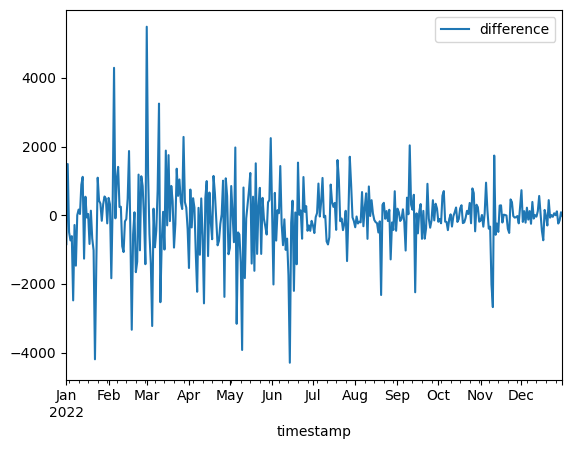

In [5]:
import matplotlib.pyplot as plt
price_data["timestamp"] = pd.to_datetime(price_data["timestamp"])
price_data.plot(x="timestamp", y="difference")
plt.show()